In [2]:
%pylab --no-import-all inline

Populating the interactive namespace from numpy and matplotlib


# Finding the locations of equation symbols

In [3]:
maths = [w.strip() for w in open('enwiki-equations.txt')]

In [4]:
from plasTeX.TeX import TeX

def source_tree(node):
    if node.childNodes:
        return (node.nodeName, [source_tree(child) for child in node.childNodes])
    if node.attributes:
        return tuple([node.nodeName]+[map(source_tree,v) for v in node.attributes.values()])
    else:
        return node.source

def get_tree(code):
    tex = TeX()
    tex.input('$%s$'%code)
    return source_tree(tex.parse().firstChild)

def get_code(tree):
    if type(tree) == tuple:
        parent = tree[0]
        if parent == 'math':
            return '$%s$' % ''.join(get_code(c) for c in tree[1] )
        else:
            children = ''.join('{%s}' % ''.join(map(get_code, c)) for c in tree[1:])
            if parent.startswith('active::'):
                return parent.replace('active::','') + children
            else:
                return '\\%s' % parent + children
    else:
        return str(tree)

In [5]:
code = maths[5]
print code
print get_code(get_tree(code))
get_tree(code)

A =\left ( \frac{1329\times10^{-H/5}}{D} \right ) ^2
$A =\left{(} \frac{1329\times 10^{-H/5}}{D} \right{)} ^{2}$


('math',
 [A,
   ,
  =,
  ('left', [u'(']),
   ,
  ('frac', [u'1329', u'\\times ', u'10', ('active::^', [u'-H/5'])], [u'D']),
   ,
  ('right', [u')']),
   ,
  ('active::^', [u'2'])])

In [6]:
def interlace(ls, start, end):
    for i, _ in enumerate(ls):
        yield ls[:i] + [start, ls[i], end] + ls[i+1:]

for i in interlace(list("abcdefghijk"), 'FOO', 'BAR'):
    print i

['FOO', 'a', 'BAR', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']
['a', 'FOO', 'b', 'BAR', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']
['a', 'b', 'FOO', 'c', 'BAR', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k']
['a', 'b', 'c', 'FOO', 'd', 'BAR', 'e', 'f', 'g', 'h', 'i', 'j', 'k']
['a', 'b', 'c', 'd', 'FOO', 'e', 'BAR', 'f', 'g', 'h', 'i', 'j', 'k']
['a', 'b', 'c', 'd', 'e', 'FOO', 'f', 'BAR', 'g', 'h', 'i', 'j', 'k']
['a', 'b', 'c', 'd', 'e', 'f', 'FOO', 'g', 'BAR', 'h', 'i', 'j', 'k']
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'FOO', 'h', 'BAR', 'i', 'j', 'k']
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'FOO', 'i', 'BAR', 'j', 'k']
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'FOO', 'j', 'BAR', 'k']
['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'FOO', 'k', 'BAR']


In [7]:
def interlace_tree(tree, start, end):
    for t, ls in enumerate(tree[1:]):
        before, after = list(tree[:t+1]), list(tree[t+2:])
        for i, _ in enumerate(ls):
            if type(ls[i]) == tuple:
                for it in interlace_tree(ls[i], start, end):
                    inter = ls[:i] + [it, end] + ls[i+1:]
                    yield tuple(before + [inter] + after)
            elif ls[i].strip():
                if len(ls[i]) > 1 and not ls[i].startswith('\\'):
                    text = ls[i]
                    for j, _ in enumerate(text):
                        inter = ls[:i] + [text[:j], start, text[j], end, text[j+1:]] + ls[i+1:]
                        yield tuple(before + [inter] + after)
                else:
                    inter = ls[:i] + [start, ls[i], end] + ls[i+1:]
                    yield tuple(before + [inter] + after)
                

for i in interlace_tree(get_tree(code), '{FOO}', '{BAR}'):
    print get_code(i)

${FOO}A{BAR} =\left{(} \frac{1329\times 10^{-H/5}}{D} \right{)} ^{2}$
$A {FOO}={BAR}\left{(} \frac{1329\times 10^{-H/5}}{D} \right{)} ^{2}$
$A =\left{{FOO}({BAR}}{BAR} \frac{1329\times 10^{-H/5}}{D} \right{)} ^{2}$
$A =\left{(} \frac{{FOO}1{BAR}329\times 10^{-H/5}}{D}{BAR} \right{)} ^{2}$
$A =\left{(} \frac{1{FOO}3{BAR}29\times 10^{-H/5}}{D}{BAR} \right{)} ^{2}$
$A =\left{(} \frac{13{FOO}2{BAR}9\times 10^{-H/5}}{D}{BAR} \right{)} ^{2}$
$A =\left{(} \frac{132{FOO}9{BAR}\times 10^{-H/5}}{D}{BAR} \right{)} ^{2}$
$A =\left{(} \frac{1329{FOO}\times {BAR}10^{-H/5}}{D}{BAR} \right{)} ^{2}$
$A =\left{(} \frac{1329\times {FOO}1{BAR}0^{-H/5}}{D}{BAR} \right{)} ^{2}$
$A =\left{(} \frac{1329\times 1{FOO}0{BAR}^{-H/5}}{D}{BAR} \right{)} ^{2}$
$A =\left{(} \frac{1329\times 10^{{FOO}-{BAR}H/5}{BAR}}{D}{BAR} \right{)} ^{2}$
$A =\left{(} \frac{1329\times 10^{-{FOO}H{BAR}/5}{BAR}}{D}{BAR} \right{)} ^{2}$
$A =\left{(} \frac{1329\times 10^{-H{FOO}/{BAR}5}{BAR}}{D}{BAR} \right{)} ^{2}$
$A =\left{(} \frac{1

In [8]:
import skimage.io

def load_image(code):
    tmp_name = str( cmp(hash(code), 0) * hash(code) )
    !tex2im-1.8/tex2im -o /tmp/{tmp_name}.png '{code}'
    im = skimage.io.imread('/tmp/{tmp_name}.png'.format(tmp_name=tmp_name))
    !rm /tmp/{tmp_name}.png
    return im

$\color{red}A\color{black} =\left{(} \frac{1329\times 10^{-H/5}}{D} \right{)} ^{2}$
$A \color{red}=\color{black}\left{(} \frac{1329\times 10^{-H/5}}{D} \right{)} ^{2}$
$A =\left{\color{red}(\color{black}}\color{black} \frac{1329\times 10^{-H/5}}{D} \right{)} ^{2}$
$A =\left{(} \frac{\color{red}1\color{black}329\times 10^{-H/5}}{D}\color{black} \right{)} ^{2}$
$A =\left{(} \frac{1\color{red}3\color{black}29\times 10^{-H/5}}{D}\color{black} \right{)} ^{2}$
$A =\left{(} \frac{13\color{red}2\color{black}9\times 10^{-H/5}}{D}\color{black} \right{)} ^{2}$
$A =\left{(} \frac{132\color{red}9\color{black}\times 10^{-H/5}}{D}\color{black} \right{)} ^{2}$
$A =\left{(} \frac{1329\color{red}\times \color{black}10^{-H/5}}{D}\color{black} \right{)} ^{2}$
$A =\left{(} \frac{1329\times \color{red}1\color{black}0^{-H/5}}{D}\color{black} \right{)} ^{2}$
$A =\left{(} \frac{1329\times 1\color{red}0\color{black}^{-H/5}}{D}\color{black} \right{)} ^{2}$
$A =\left{(} \frac{1329\times 10^{\color{red}-\color{bla

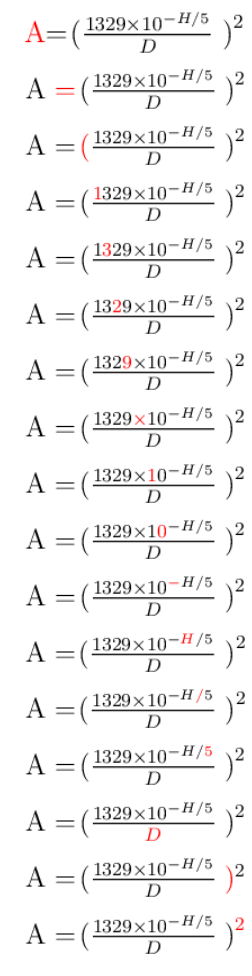

In [9]:
parts = []
for i in list(interlace_tree(get_tree(code), ('color', ['red']), ('color', ['black']))):
    c = get_code(i)
    print c
    im = load_image(c)
    parts.append( im )
    
pyplot.subplots(figsize=(4,len(parts)))
for i,p in enumerate(parts):
    ax = pyplot.subplot(len(parts),1,i+1)
    ax.set_axis_off()
    ax.imshow(p)

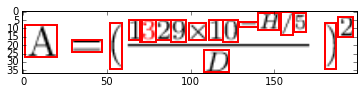

In [10]:
first = lambda l: next(i for i, v in enumerate(l) if v)-1
last = lambda l: len(l) - next(i for i, v in enumerate(reversed(l)) if v)

part_positions = []

for part in parts:
    image = part[:,:,0]-part[:,:,1]
    pyplot.imshow(1-image, cmap='gray')
    hor, ver = image.sum(axis=0), image.sum(axis=1)
    part_positions.append( (first(ver),first(hor), last(ver),last(hor)) )

    
def draw_rect(ax, t,l,b,r):
    ax.add_patch( matplotlib.patches.Rectangle(
        (l, t), r - l, b - t, fill=False, edgecolor='red', linewidth=2) )

ax = pyplot.axes()
# im = load_image(parts[0])
ax.imshow(parts[4], cmap='gray')
for pp in part_positions:
    draw_rect(ax, *pp)

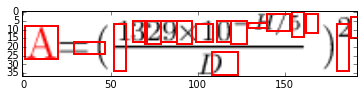

In [11]:
ax = pyplot.axes()
# im = load_image(parts[0])
ax.imshow(parts[0], cmap='gray')
for pp in part_positions:
    draw_rect(ax, *pp)

# ????